In [358]:
import matplotlib.pyplot as plt
import matplotlib

In [359]:
matplotlib.rcParams['font.family'] = "Segoe UI"
matplotlib.rcParams['font.size'] = 16

In [370]:
import pandas
import geopandas
import glob

from match_precincts import find_matches

In [371]:
gdf = geopandas.read_file("./shapefiles/GA_precincts16.shp")

In [407]:
merged_counties = pandas.concat([pandas.read_csv(filename, dtype={"PRECINCT": str}) for filename in glob.glob("./merged/*.csv")], sort=True)

In [408]:
original = pandas.read_csv("GA_precincts_with_absentee.csv")

In [409]:
indices_to_drop = original[original["COUNTY"].isin(set(merged_counties["COUNTY"]))].index

In [410]:
with_merged_counties = pandas.concat([original.drop(indices_to_drop, axis="index"), merged_counties], sort=True)
with_merged_counties.reset_index(inplace=True)

In [411]:
assert set(with_merged_counties["COUNTY"]) == set(original["COUNTY"])

In [412]:
assert set(merged_counties["COUNTY"]) <= set(with_merged_counties["COUNTY"])

In [413]:
errors = with_merged_counties.groupby("COUNTY")["PRES16D"].sum() - gdf["PRES16D"].astype(int).groupby(gdf["CTYNAME"]).sum()

In [414]:
errors[errors != 0]

Series([], Name: PRES16D, dtype: int64)

In [415]:
matches = find_matches(with_merged_counties, gdf)

In [416]:
set(original["COUNTY"]) - set(matches.county)

set()

In [417]:
join_on = matches.set_index("index")[["county", "match_value"]].sum(axis=1)

In [418]:
with_merged_counties["JOINON"] = join_on

In [419]:
gdf.drop(["PRES16D", "PRES16R", "PRES16L"], axis="columns", inplace=True)

In [420]:
merged_gdf = gdf.merge(with_merged_counties, left_on=gdf[["CTYNAME", "PRECINCT_N"]].sum(axis=1), right_on="JOINON")

In [421]:
merged_gdf.to_crs(epsg=26966, inplace=True)

In [424]:
merged_gdf.to_file("./shapefiles/GA_precincts16_absentee_initial.shp")

In [423]:
assert set(merged_gdf["CTYNAME"]) == set(original["COUNTY"])

In [354]:
reg_rate = registered_rate[registered_rate < 10]

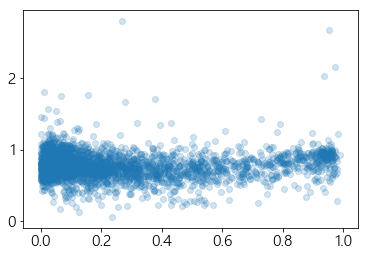

In [357]:
plt.scatter(x=bvap_pct[registered_rate < 10], y=reg_rate, alpha=0.2)